<a href="https://colab.research.google.com/github/Affreenunisa/Affreenunisa/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv'
for encoding in encodings:
    try:
        df = pd.read_csv(file_path,encoding = encoding)
        print(f"File successfully read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding:{encoding}")
        continue
if 'df' in locals():

    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed,Unable to read the CSV file.")


Failed to read with encoding:utf-8
File successfully read with encoding:latin1
CSV file has been successfully loaded


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
99,ham,Please don't text me anymore. I have nothing e...,NaN,NaN,NaN
624,ham,"Nah it's straight, if you can just bring bud o...",NaN,NaN,NaN
2034,ham,Is avatar supposed to have subtoitles,NaN,NaN,NaN
4833,ham,I hope your pee burns tonite.,NaN,NaN,NaN
4284,ham,I pocked you up there before,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace =True)

In [8]:
df.sample(5)

,v1,v2
5407,ham,Yup he msg me: is tat yijue? Then i tot it's m...
5506,ham,God's love has no limit. God's grace has no me...
2999,ham,Id onluy matters when getting on from offcampus
5539,ham,Just sleeping..and surfing
874,ham,Talk With Yourself Atleast Once In A Day...!!!...


In [9]:
df.rename(columns={'v1': 'target','v2': 'text'},inplace = True)
df.sample(5)

,target,text
5456,spam,\For the most sparkling shopping breaks from 4...
5173,ham,U 2.
5517,ham,Miles and smiles r made frm same letters but d...
5476,ham,Yes princess! I want to please you every night...
3077,ham,Okay but i thought you were the expert


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7cdb4988f100>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

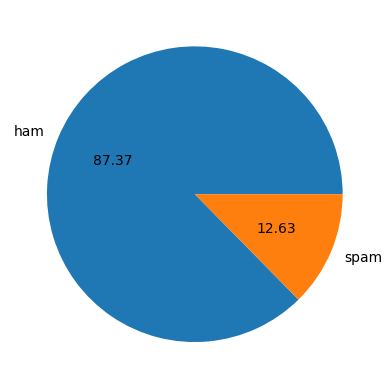

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [21]:
import nltk

In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df.loc[:, "num_characters"] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df.loc[:, "num_words"] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df.loc[:, "num_sentences"] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns
import pandas as pd

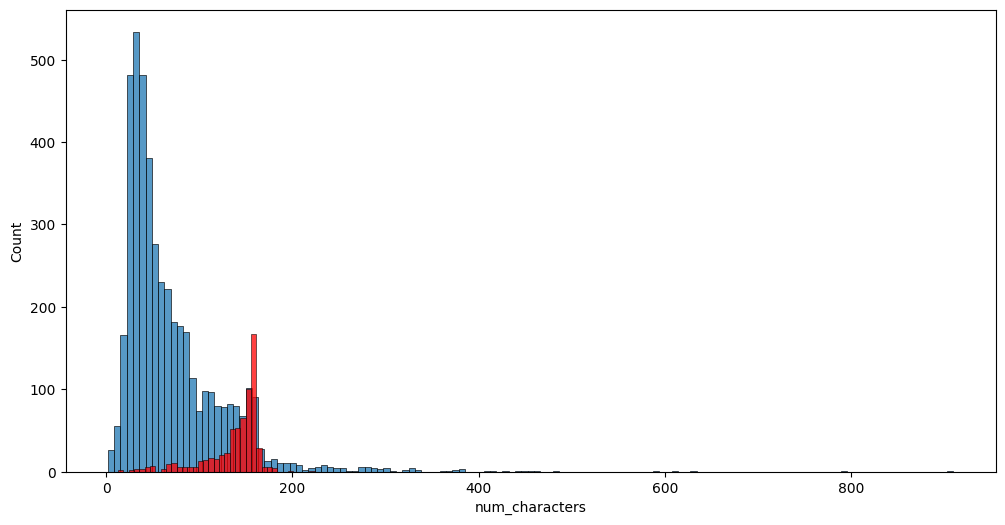

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert inf values to NaN
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['target'] == 0]['num_characters'])
    sns.histplot(df[df['target'] == 1]['num_characters'], color='red')


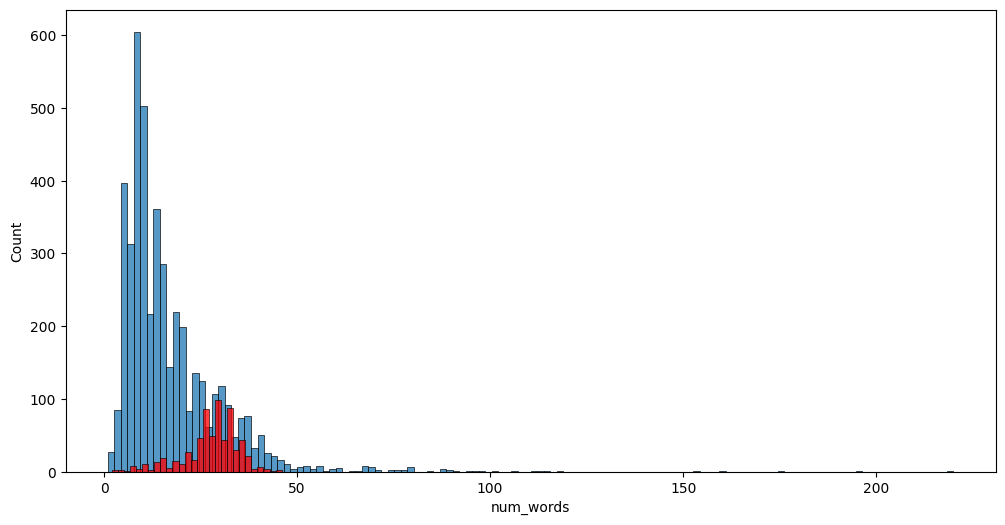

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

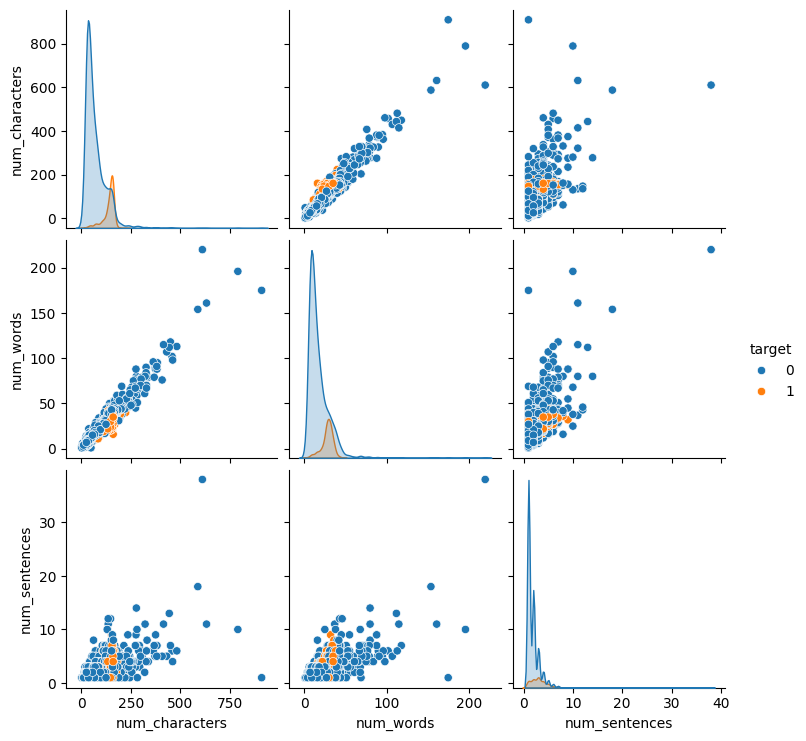

In [35]:
import pandas as pd
import seaborn as sns

# Convert inf values to NaN
with pd.option_context('mode.use_inf_as_na', True):
    sns.pairplot(df, hue='target')


<Axes: >

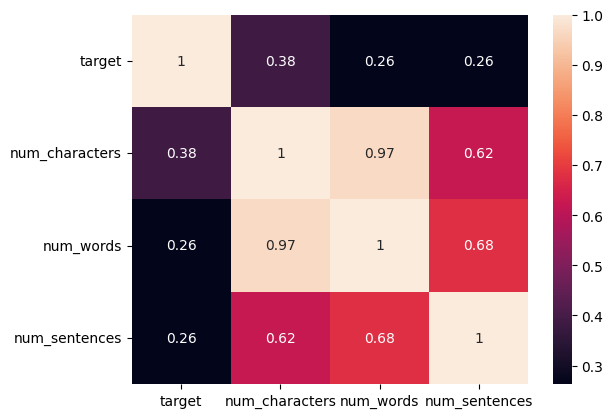

In [36]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64', 'int32']).corr(), annot=True)

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def  transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
transformed_text= transform_text("I'm gonna be home soon and i don't want to talk this stuff anymore tonight, k?I've cri enough today")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [50]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [52]:
df["transformed_text"]= df["text"].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc= WordCloud(width = 500,height =500, min_font_size = 10,background_color ='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

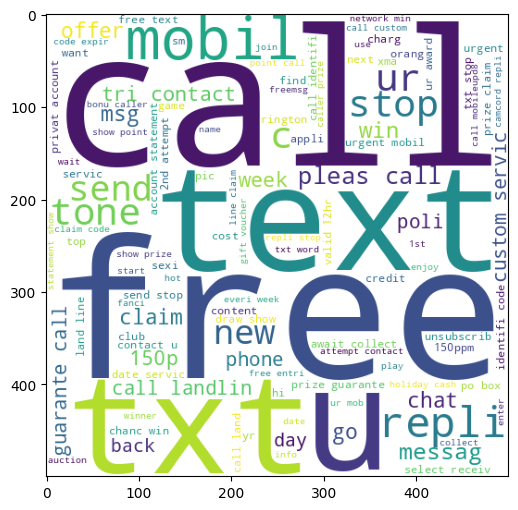

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=' '))

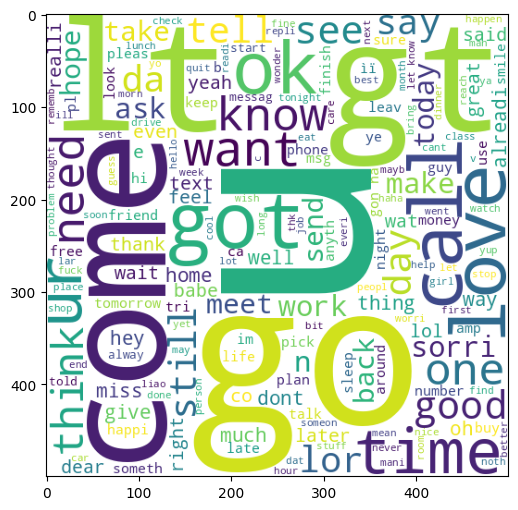

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

In [65]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

35404

In [ ]:
from collections import Counter
counter = Counter(spam_corpus)
most_common_30 = counter.most_common(30)
df_most_common = pd.DataFrame(most_common_30)

sns.barplot(x=df_most_common[0], y=df_most_common[1])
plt.xticks(rotation='vertical')

plt.show()


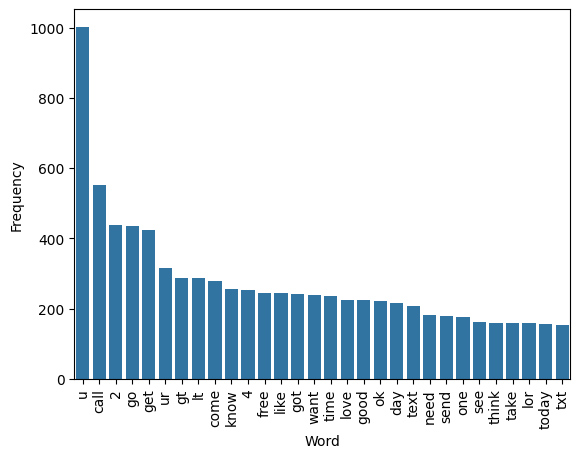

In [71]:
from collections import Counter
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)
df1 = pd.DataFrame(most_common_words, columns=['Word','Frequency'])

sns.barplot(x='Word', y='Frequency', data =df1 )
plt.xticks(rotation='vertical')

plt.show()


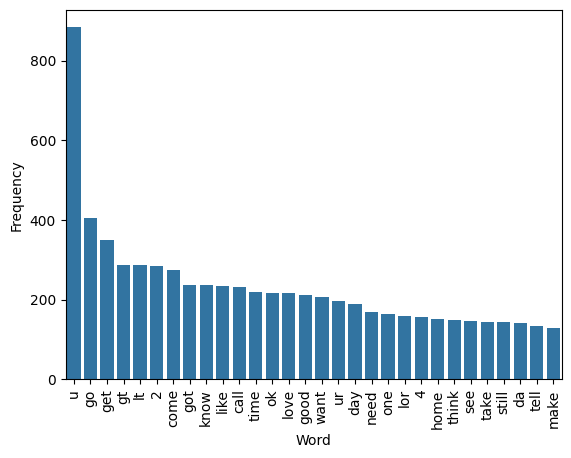

In [72]:
word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)
df2 = pd.DataFrame(most_common_words, columns=['Word','Frequency'])

sns.barplot(x='Word', y='Frequency', data =df2 )
plt.xticks(rotation='vertical')

plt.show()

In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [80]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
y = df['target'].values

In [81]:
X.shape

(5169, 3000)

In [82]:
y= df['target'].values

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [97]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [98]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [103]:
pip install xgboost

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [109]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc =KNeighborsClassifier()
mnb =MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=5)
Irc =LogisticRegression (solver='liblinear', penalty='11')
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc =AdaBoostClassifier(n_estimators=50, random_state=2)
bc  =BaggingClassifier(n_estimators=50, random_state=2)
etc  =ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [118]:
clfs= {
'SVC': svc,
"KN": knc,
"NB": mnb,
'DT': dtc,

'RF': rfc,
'AdaBoost': abc,
'BC': bc,
 'ETC': etc,
"GBOT":gbdt,
"xgb":xgb
}

In [128]:
def train_classifier(clf,x_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred= clf.predict(X_test)
  accuracy =accuracy_score(y_test,y_pred)
  precision =precision_score(y_test,y_pred)
  return accuracy, precision

In [129]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [138]:
accuracy_scores= []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy,current_precision= train_classifier(clf, X_train,y_train,X_test,y_test)
  print("For ",name)
  print("Accuracy- ",current_accuracy)
  print("Precision- ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy-  0.9758220502901354
Precision-  0.9747899159663865
For  KN
Accuracy-  0.9052224371373307
Precision-  1.0
For  NB
Accuracy-  0.9709864603481625
Precision-  1.0
For  DT
Accuracy-  0.9274661508704062
Precision-  0.8118811881188119
For  RF
Accuracy-  0.9758220502901354
Precision-  0.9829059829059829
For  AdaBoost
Accuracy-  0.960348162475822
Precision-  0.9292035398230089
For  BC
Accuracy-  0.9584139264990329
Precision-  0.8682170542635659
For  ETC
Accuracy-  0.9748549323017408
Precision-  0.9745762711864406
For  GBOT
Accuracy-  0.9468085106382979
Precision-  0.9191919191919192
For  xgb
Accuracy-  0.9671179883945842
Precision-  0.9262295081967213


In [140]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [141]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.927466,0.811881
4,RF,0.975822,0.982906
5,AdaBoost,0.960348,0.929204
6,BC,0.958414,0.868217
7,ETC,0.974855,0.974576
8,GBOT,0.946809,0.919192
9,xgb,0.967118,0.926230


In [142]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [143]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.927466
4,RF,Accuracy,0.975822
5,AdaBoost,Accuracy,0.960348
6,BC,Accuracy,0.958414
7,ETC,Accuracy,0.974855
8,GBOT,Accuracy,0.946809
9,xgb,Accuracy,0.967118


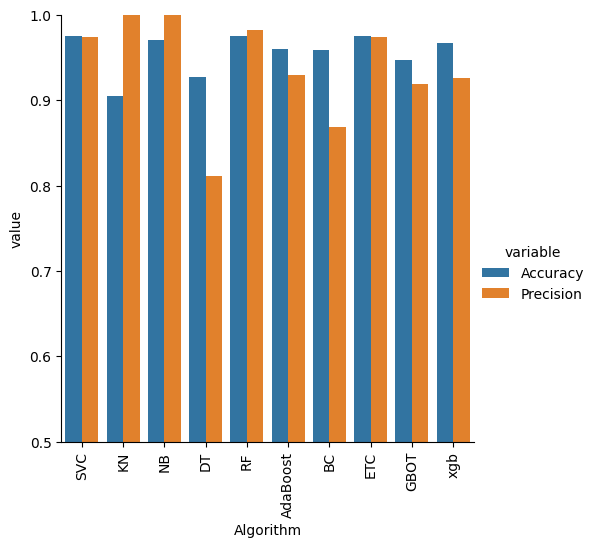

In [147]:
sns.catplot(x= 'Algorithm', y='value',
            hue='variable', data=performance_df1, kind="bar", height=5)

plt.ylim(0.5,1.0)

plt.xticks(rotation="vertical")

plt.show()

In [163]:
temp_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy_max_ft_3000":accuracy_scores, "precision_max_ft_3000": precision_scores}).sort_values("precision_max_ft_3000",ascending=False)

In [155]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [156]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [164]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,"Precision_num_char":precision_scores}).sort_values('Precision_num_char',ascending = False)

In [180]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,"Accuracy_max_ft_3000':accuracy_scores, 'précision_max_ft_3000_x","Accuracy_max_ft_3000':accuracy_scores, 'précision_max_ft_3000_y",Accuracy_num_chars,Precision_num_char
0,SVC,0.975822,0.974790,0.974790,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,1.000000,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,1.000000,1.000000,0.970986,1.000000
3,DT,0.927466,0.811881,0.811881,0.811881,0.927466,0.811881
4,RF,0.975822,0.982906,0.982906,0.982906,0.975822,0.982906
5,AdaBoost,0.960348,0.929204,0.929204,0.929204,0.960348,0.929204
6,BC,0.958414,0.868217,0.868217,0.868217,0.958414,0.868217
7,ETC,0.974855,0.974576,0.974576,0.974576,0.974855,0.974576
8,GBOT,0.946809,0.919192,0.919192,0.919192,0.946809,0.919192
9,xgb,0.967118,0.926230,0.926230,0.926230,0.967118,0.926230


In [182]:
import pandas as pd

# Create DataFrames
temp_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_max_ft_3000": accuracy_scores, "Precision_max_ft_3000": precision_scores}).sort_values("Precision_max_ft_3000", ascending=False)
new_df = performance_df.merge(temp_df, on='Algorithm')
new_df_scaled = new_df.merge(temp_df, on='Algorithm', suffixes=('_unscaled', '_scaled'))

# Sort and display the merged DataFrame
merged_df = new_df_scaled.merge(temp_df, on='Algorithm')
print(merged_df)


  Algorithm  Accuracy  Precision  Accuracy_max_ft_3000_unscaled  \
0       SVC  0.975822   0.974790                       0.975822   
1        KN  0.905222   1.000000                       0.905222   
2        NB  0.970986   1.000000                       0.970986   
3        DT  0.927466   0.811881                       0.927466   
4        RF  0.975822   0.982906                       0.975822   
5  AdaBoost  0.960348   0.929204                       0.960348   
6        BC  0.958414   0.868217                       0.958414   
7       ETC  0.974855   0.974576                       0.974855   
8      GBOT  0.946809   0.919192                       0.946809   
9       xgb  0.967118   0.926230                       0.967118   

   Precision_max_ft_3000_unscaled  Accuracy_max_ft_3000_scaled  \
0                        0.974790                     0.975822   
1                        1.000000                     0.905222   
2                        1.000000                     0.970986  

In [207]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
svc= SVC(kernel='signold', gamma=1.0, probability =True)

mnb= MultinomialNB()

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [208]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [209]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create individual classifiers
svm_clf = SVC(kernel='rbf')  # You can use 'rbf', 'linear', 'poly', 'sigmoid', etc. for kernel
rf_clf = RandomForestClassifier()

# Create the voting classifier
voting = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf)], voting='hard')

# Fit the voting classifier
voting.fit(X, y)


VotingClassifier(estimators=[('svm', SVC()), ('rf', RandomForestClassifier())])

In [186]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
X_test = X_test[:, :20]
svc = SVC(max_iter=3000)
y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.13249516441005801
Precision: 0.13262342691190707


In [210]:
estimators= [('svn', svc), ('nb', mnb), ('et', etc)]
final_estimator =RandomForestClassifier()


In [216]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Your additional code here...

In [217]:
clf = StackingClassifier(estimators=[('svc', SVC(kernel='linear'))])

In [222]:
import pickle
pickle.dump(tfidf, open('vectorizer.pk1','wb'))
pickle.dump(mnb, open("model.pkl",'wb'))

In [225]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train= ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train =[0, 1, 0] # Example labels (0 for negative, 1 for positive)
tfidf=TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)
mnb =MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

#Save the trained IF-IDF veftorizer and Naive Bayes model to files with open("vectorizer.pkl', 'wb') as vectorizer file: pickle.dump(tfidf, vectorizer file)

with open("vectorizer.pk1", 'wb') as vectorizer_file:
  pickle.dump(tfidf, vectorizer_file)
with open('model.pk1','wb') as model_file:
  pickle.dump(mnb, model_file)
